In [128]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In [129]:
ctrl={}
case={}

ctrl['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'
ctrl['machine_target']='gfdl.ncrc4-intel19-prod'
ctrl['name']='OM4p5_CORE2_IAF_gzCOBALT-013022_cy5'

case['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2'
case['machine_target']='gfdl.ncrc4-intel19-prod'
#case['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_cy5'
#case['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5'
case['name']='OM4p5_CORE2_IAF_gzCOBALT-hp_cy5'

In [130]:
short_casename=case['name'].replace('OM4p5_CORE2_IAF_','')
if short_casename=="gzCOBALT-060822":
    fig_casename='gzCOBALT-tun_cy1'
else:
    fig_casename=short_casename
print(short_casename, fig_casename)

gzCOBALT-hp_cy5 gzCOBALT-hp_cy5


In [131]:
tmpdir = '/work/Jessica.Luo/tmp/'+case['name']
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5


In [132]:
# read in files
diagTypes = ['ocean_cobalt_btm'] 

pp_dates='1988-2007'

files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

files=sorted([f for fi in files for f in fi]) # nested list comprehension
print(files)

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.09.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.10.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.11.nc', '/work/Je

In [133]:
if not files:
    pp_path=os.path.join(case['path_root'], case['name'], case['machine_target'], 'pp')
    
    files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    files=sorted([f for fi in files for f in fi]) # nested list comprehension
    print(files)


In [134]:
ds=xr.open_mfdataset(files, combine='by_coords')

#grid_file=os.path.join(case['path_root'], case['name'], case['machine_target'], 'pp')+'/ocean_annual/ocean_annual.static.nc'
grid_file='/work/jyl/tmp/ocean_static.nc'
grid=xr.open_dataset(grid_file)

In [135]:
tmpdir = '/work/Jessica.Luo/tmp/'+ctrl['name']
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)
    
# read in files
diagTypes = ['ocean_cobalt_btm'] 

c_pp_dates='1988-2007'

c_files=[glob(tmpdir + '/'+ d + '.' + c_pp_dates + '*.nc') for d in diagTypes]

c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

if not c_files:
    pp_path=os.path.join(ctrl['path_root'], ctrl['name'], ctrl['machine_target'], 'pp')
    
    c_files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + c_pp_dates + '*.nc') for d in diagTypes]
    
    c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

#print(c_files)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5


In [136]:
dc=xr.open_mfdataset(c_files, combine='by_coords')

In [137]:
days_in_month = xr.DataArray([31,28,31,30,31,30,31,31,30,31,30,31], coords={'time':ds.time}, dims='time')

In [138]:
days_in_month_wgts=days_in_month / days_in_month.mean()
days_in_month_wgts

<xarray.DataArray (time: 12)>
array([1.01917808, 0.92054795, 1.01917808, 0.98630137, 1.01917808,
       0.98630137, 1.01917808, 1.01917808, 0.98630137, 1.01917808,
       0.98630137, 1.01917808])
Coordinates:
  * time     (time) object 1999-07-18 00:00:00 ... 2000-06-17 00:00:00

# Observations

In [139]:
# Oxygen, units of µmol/kg
o2_obs_file = '/work/jyl/proj/ESM4.2_COBALT/COBALT_diagnostics/Remapped_Data/O2_woa18_esm4grid.nc'
o2_obs = xr.open_dataset(o2_obs_file).O2_woa18

## Get bottom grid index

In [140]:
o2_obs

<xarray.DataArray 'O2_woa18' (z_l: 35, yh: 576, xh: 720)>
[14515200 values with dtype=float64]
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75

# Compare
convert model values to micromol o2 m-3 ($\mu$M)

In [141]:
ds.btm_o2.attrs

{'long_name': 'Bottom Oxygen',
 'units': 'mol kg-1',
 'cell_measures': 'area: areacello',
 'cell_methods': 'area:mean yh:mean xh:mean time: mean within months time: mean over years',
 'time_avg_info': 'average_T1,average_T2,average_DT'}

In [142]:
o2_mod = ds.btm_o2 * 1.025 * 1e6 # convert from mol/kg to micromol/m3 assuming 1.025 kg/m3 seawater density
o2_mod = (o2_mod * days_in_month_wgts).mean(dim='time')
o2_mod

<xarray.DataArray (yh: 576, xh: 720)>
dask.array<mean_agg-aggregate, shape=(576, 720), dtype=float64, chunksize=(576, 720), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89

In [143]:
o2_ctrl = dc.btm_o2 * 1.025 * 1e6 # convert from mol/kg to micromol/m3 assuming 1.025 kg/m3 seawater density
o2_ctrl = (o2_ctrl * days_in_month_wgts).mean(dim='time')
o2_ctrl

<xarray.DataArray (yh: 576, xh: 720)>
dask.array<mean_agg-aggregate, shape=(576, 720), dtype=float64, chunksize=(576, 720), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89

### Evaluate Skill Metrics

In [144]:
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())

# def rmse_diffs(differences):
#     return np.sqrt(np.sum((differences ** 2)/len(differences)))

In [145]:
# def log_differences(ds1, ds2, minimum=0.1):
#     if(len(ds1) != len(ds2)):
#         print('ERROR: Arrays are not the same length')
#         return NULL
#     array_length=len(ds1)
#     min_array = np.repeat(minimum,array_length)
    
#     log_ds1 = np.log10(np.maximum(ds1, min_array))
#     log_ds2 = np.log10(np.maximum(ds2, min_array))
    
#     return log_ds1 - log_ds2

In [146]:
# # Annual means, Oxygen
# X=o2_mod.stack(z=('xh','yh')).values
# Y=o2_obs.stack(z=('xh','yh')).values
# mask = np.logical_and(~np.isnan(X),~np.isnan(Y))

# ma_len = len(X[mask])
# res1_c_o2 = X[mask] - Y[mask]
# res2_c_o2 = log_differences(X[mask],Y[mask],minimum=0.1)
# skew1_c_o2 = stats.skew(res1_c_o2)
# skew2_c_o2 = stats.skew(res2_c_o2)
# res_c_o2 = res1_c_o2
# r_c_o2 = stats.pearsonr(X[mask],Y[mask])[0]
# rmse_c_o2 = rmse_diffs(res_c_o2)
# bias_c_o2 = np.mean(res_c_o2)

# Plot

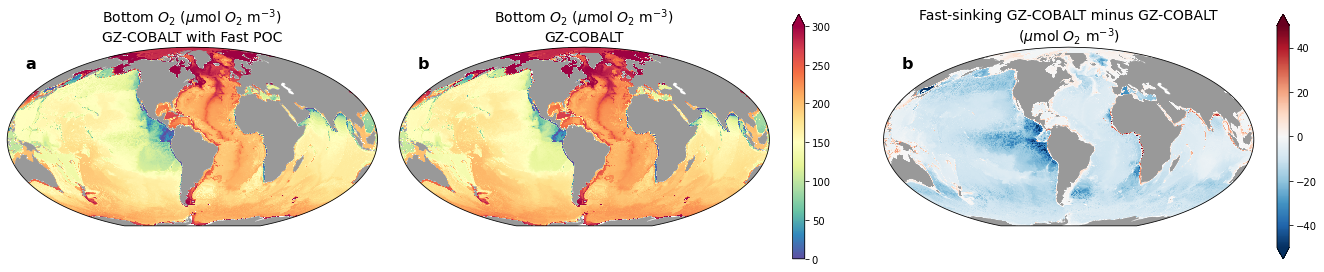

In [147]:
fig=plt.figure(figsize=(24,6))
gs=gridspec.GridSpec(1,3, wspace=0.05, width_ratios=[1,1.25,1.25])

ax={};cs={}


fastgz=o2_mod
ctrlgz=o2_ctrl

i=0
field=fastgz
ax[i]=plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=0, vmax=300, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Bottom $O_2$ ($\mu$mol $O_2$ m$^{-3}$)\nGZ-COBALT with Fast POC', fontsize=14)

ax[i].text(0.05, 0.95, 'a', transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=1
field=ctrlgz
ax[i]=plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=0, vmax=300, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Bottom $O_2$ ($\mu$mol $O_2$ m$^{-3}$)\nGZ-COBALT', fontsize=14)
ax[i].text(0.05, 0.95, 'b', transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='max')

i=2
field=fastgz-ctrlgz
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-50, vmax=50, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Fast-sinking GZ-COBALT minus GZ-COBALT\n($\mu$mol $O_2$ m$^{-3}$)', fontsize=14)
ax[i].text(0.05, 0.95, 'b', transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

plt.tight_layout()
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_BottomO2_Comparison.png', dpi=300, bbox_inches='tight')
